In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

# from Models.dataset import load_train_data, load_test_data


In [22]:
def load_train_data(img_size):
    """
    This function loads a dataset of images from a specified path, resizes the images, 
    and stores them in a pandas DataFrame along with their respective classes.

    The images are categorized into four classes: 'MildDemented', 'ModerateDemented', 
    'NonDemented', and 'VeryMildDemented'. The function iterates through each class, 
    opens and resizes the images, and appends them to a dictionary along with their class.

    The dictionary is then converted into a pandas DataFrame and returned.

    Returns:
        df_train (pd.DataFrame): A DataFrame containing the resized images and their classes.
    """
    
    df_train=[] # create a dictionary to store the dataset
    labels=[] # create a list to store the labels

    """# create dataset from the image folder"""

    classes=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
    train_path=''

    for i in classes:
        if i=='MildDemented':
            train_path='../Dataset/train/MildDemented/mildDem'
        elif i=='ModerateDemented':
            train_path='../Dataset/train/ModerateDemented/moderateDem'
        elif i=='NonDemented':
            train_path='../Dataset/train/NonDemented/nonDem'
        else:
            train_path='../Dataset/train/VeryMildDemented/veryMildDem'
        for j in range(100000):
            try:
                img=cv2.imread(f'{train_path}{j}.jpg')
                img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
                labels.append(i)
                df_train.append(cv2.resize(img_gray,(img_size,img_size)).reshape(img_size*img_size))

            except:
                break

    """# save Dataset into a pandas Dataframe"""
    return np.array(df_train),labels

In [23]:
img_size=150
df_train,labels=load_train_data(img_size)

In [24]:
print(df_train.shape)
# df_train.head()
df_train=pd.DataFrame(df_train)
df_train['class']=labels

(5121, 22500)


In [25]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,22491,22492,22493,22494,22495,22496,22497,22498,22499,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MildDemented
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MildDemented
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MildDemented
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MildDemented
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MildDemented


In [26]:
X,Y=df_train.iloc[:,:-1].values,df_train.iloc[:,-1]
X=X.reshape(X.shape[0],img_size,img_size,1)


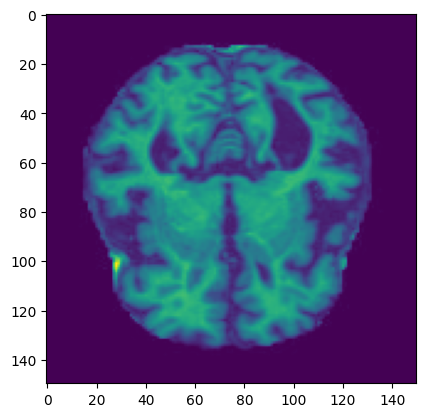

In [27]:
plt.imshow(X[0])

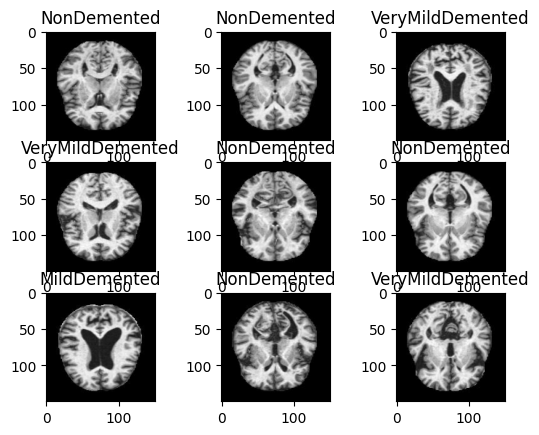

In [28]:
import random
for i in range(0,9):
    j=random.randint(0,X.shape[0])
    plt.subplot(330+1+i)
    plt.imshow(X[j].reshape(img_size,img_size),cmap=plt.get_cmap('gray'))
    plt.title(Y[j])

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [30]:
Y_train
# encode the target variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y_train=le.fit_transform(Y_train)
Y_test=le.transform(Y_test)


In [31]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical

y_train=to_categorical(Y_train)
y_test=to_categorical(Y_test)

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,1),padding='same')) #f=3,p=1,s=1,c=32 img_size=100
model.add(MaxPooling2D(2,2)) #f=2,s=2 size=100*100*32

model.add(Conv2D(32,(3,3),activation='relu',padding='same')) #f=3,p=1,s=1,c=32 size=100*100*32
# add batch normalisation
model.add(BatchNormalization())
# Add pooling layer
model.add(MaxPooling2D(2,2)) #f=2,s=2 size=50*50*32
model.add(Conv2D(64,(3,3),activation='relu',padding='same')) #f=3,p=1,s=1,c=64 size=50*50*64
model.add(MaxPooling2D(2,2)) #f=2,s=2 size=25*25*64

model.add(Conv2D(64,(3,3),activation='relu',padding='same')) #f=3,p=1,s=1,c=64 size=25*25*64
model.add(MaxPooling2D(2,2)) #f=2,s=2 size=12*12*64

model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',padding='same')) #f=3,p=1,s=1,c=64 size=12*12*64
#Add pooling layer
model.add(MaxPooling2D(2,2)) #f=2,s=2 size=6*6*64
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))

model.compile(optimizer=Adam(lr=0.01),loss=categorical_crossentropy,metrics=['accuracy'])

model.fit(X_train,y_train,epochs=15,batch_size=128,validation_data=(X_test,y_test))

# model.save('model1.h5')


Epoch 1/15
32/32 [==============================] - 26s 800ms/step - loss: 1.1681 - accuracy: 0.4968 - val_loss: 1.4855 - val_accuracy: 0.1600
Epoch 2/15
32/32 [==============================] - 25s 784ms/step - loss: 0.8548 - accuracy: 0.6082 - val_loss: 1.3068 - val_accuracy: 0.2234
Epoch 3/15
32/32 [==============================] - 25s 784ms/step - loss: 0.7764 - accuracy: 0.6487 - val_loss: 1.0068 - val_accuracy: 0.5678
Epoch 4/15
32/32 [==============================] - 26s 811ms/step - loss: 0.6713 - accuracy: 0.7080 - val_loss: 0.8681 - val_accuracy: 0.5610
Epoch 5/15
32/32 [==============================] - 25s 796ms/step - loss: 0.5955 - accuracy: 0.7498 - val_loss: 0.8753 - val_accuracy: 0.5551
Epoch 6/15
32/32 [==============================] - 25s 795ms/step - loss: 0.4763 - accuracy: 0.8098 - val_loss: 0.8181 - val_accuracy: 0.5990
Epoch 7/15
32/32 [==============================] - 25s 794ms/step - loss: 0.3266 - accuracy: 0.8892 - val_loss: 1.0630 - val_accuracy: 0.4966

In [34]:
accuracy=model.evaluate(X_test,y_test)[1]
model.save('model_size_150_lr_0.01.h5')

33/33 [==============================] - 2s 46ms/step - loss: 0.2252 - accuracy: 0.9200


C:\Users\kshitizsinha\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
from sklearn.model_selection import KFold
from keras.models import load_model
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical

kf=KFold(n_splits=5,shuffle=True,random_state=42)
kf.get_n_splits(X)

y=to_categorical(le.fit_transform(Y))
accs=[]

for train_index,test_index in kf.split(X):
    
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    
    model=load_model('model1.h5')
    
    model.fit(X_train,y_train,epochs=10,batch_size=128,validation_data=(X_test,y_test))
    

    
    accs.append(model.evaluate(X_test,y_test)[1])
model.save('model_5_CV.h5')
print(f'Accuracy after 5-Fold CV: {np.mean(accs)}')

Epoch 1/10
32/32 [==============================] - 25s 783ms/step - loss: 0.0176 - accuracy: 0.9973 - val_loss: 0.1464 - val_accuracy: 0.9454
Epoch 2/10
32/32 [==============================] - 26s 803ms/step - loss: 0.0147 - accuracy: 0.9976 - val_loss: 0.2040 - val_accuracy: 0.9307
Epoch 3/10
32/32 [==============================] - 26s 810ms/step - loss: 0.0086 - accuracy: 0.9993 - val_loss: 0.1493 - val_accuracy: 0.9493
Epoch 4/10
32/32 [==============================] - 25s 793ms/step - loss: 0.0061 - accuracy: 0.9995 - val_loss: 0.1510 - val_accuracy: 0.9473
Epoch 5/10
32/32 [==============================] - 25s 790ms/step - loss: 0.0059 - accuracy: 0.9993 - val_loss: 0.1990 - val_accuracy: 0.9327
Epoch 6/10
32/32 [==============================] - 25s 793ms/step - loss: 0.0068 - accuracy: 0.9995 - val_loss: 0.0782 - val_accuracy: 0.9717
Epoch 7/10
32/32 [==============================] - 26s 800ms/step - loss: 0.0046 - accuracy: 0.9998 - val_loss: 0.2371 - val_accuracy: 0.9122

C:\Users\kshitizsinha\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
print(accs)

[0.9073171019554138, 0.6689453125, 0.3955078125, 0.763671875, 0.6083984375]
